First, import the libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To remove unwanted warnings
import warnings
warnings.filterwarnings("ignore")

Let's import the sklearn library that will be used for machine learning.

In [ ]:
import sklearn

Then we load the Iris data set from sklearn

In [ ]:
# Read the data set
from sklearn.datasets import load_iris
iris = load_iris()

type(iris)

sklearn.utils.Bunch

Now we convert this Bunch data set to Dataframe.

In [ ]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

Let's see what happen to shape of our data set.

In [ ]:
# Shape of the data
data1.shape

(150, 5)

There are five(5) features of columns and 150 rows of observations.

Show the first five(5) rows of the Iris data set.

In [ ]:
# Print the first five(5) rows
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


There are basically three(3) types of class which are 0 means *Setosa*, 1 means *Versicolor*, and 2 means *Virginica*.

In [ ]:
data1['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

Then add a column 'Species' to the DataSet with this classification.

In [ ]:
def categorize(a):
    if a == 0.0:
        return('setosa')
    if a == 1.0:
        return('versicolor')
    return('virginica')
data1['Species'] = data1['target'].apply(categorize)

Now, let's see again our Iris data set.

In [ ]:
# Print the first five(5) rows of data set
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Next, plot the data and classification to see data has a classification.

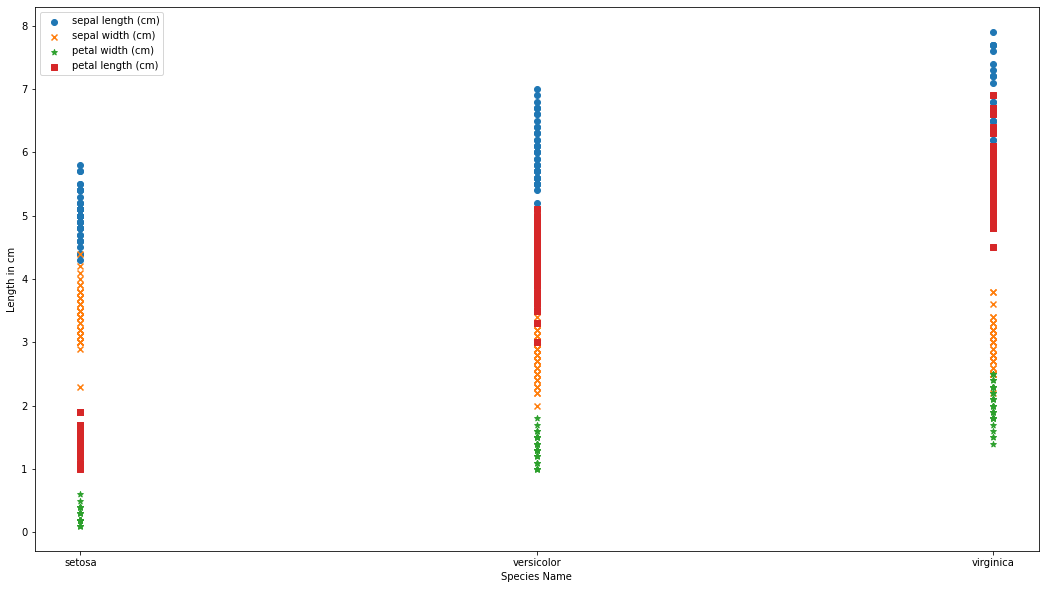

In [ ]:
plt.figure(figsize=[18,10])
d1 = plt.scatter(data1['Species'], data1['sepal length (cm)'],  marker= 'o')
d2 = plt.scatter(data1['Species'], data1['sepal width (cm)'], marker= 'x')
d3 = plt.scatter(data1['Species'], data1['petal width (cm)'], marker= '*')
d4 = plt.scatter(data1['Species'], data1['petal length (cm)'], marker= ',')

plt.ylabel('Length in cm')
plt.xlabel('Species Name')

plt.legend([d1, d2, d3, d4],
           ['sepal length (cm)','sepal width (cm)', 'petal width (cm)','petal length (cm)'])
plt.show()



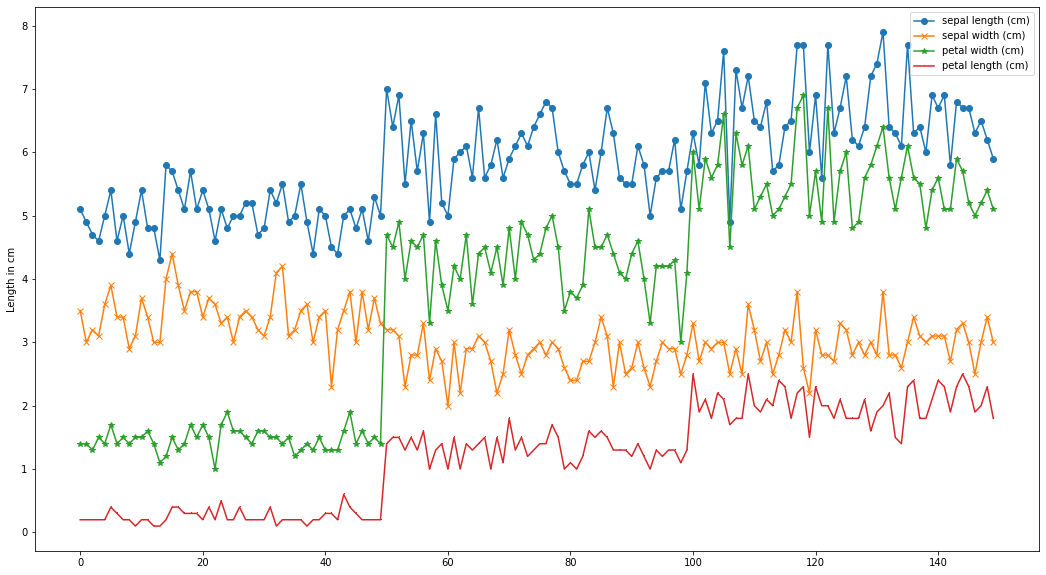

In [ ]:
plt.figure(figsize=[18,10])
d1 = plt.plot(data1['sepal length (cm)'], marker= 'o')
d2 = plt.plot(data1['sepal width (cm)'], marker= 'x')
d3 = plt.plot(data1['petal length (cm)'], marker= '*')
d4 = plt.plot(data1['petal width (cm)'], marker= ',')

plt.ylabel('Length in cm')
plt.legend(['sepal length (cm)','sepal width (cm)', 'petal width (cm)','petal length (cm)'])

plt.show()

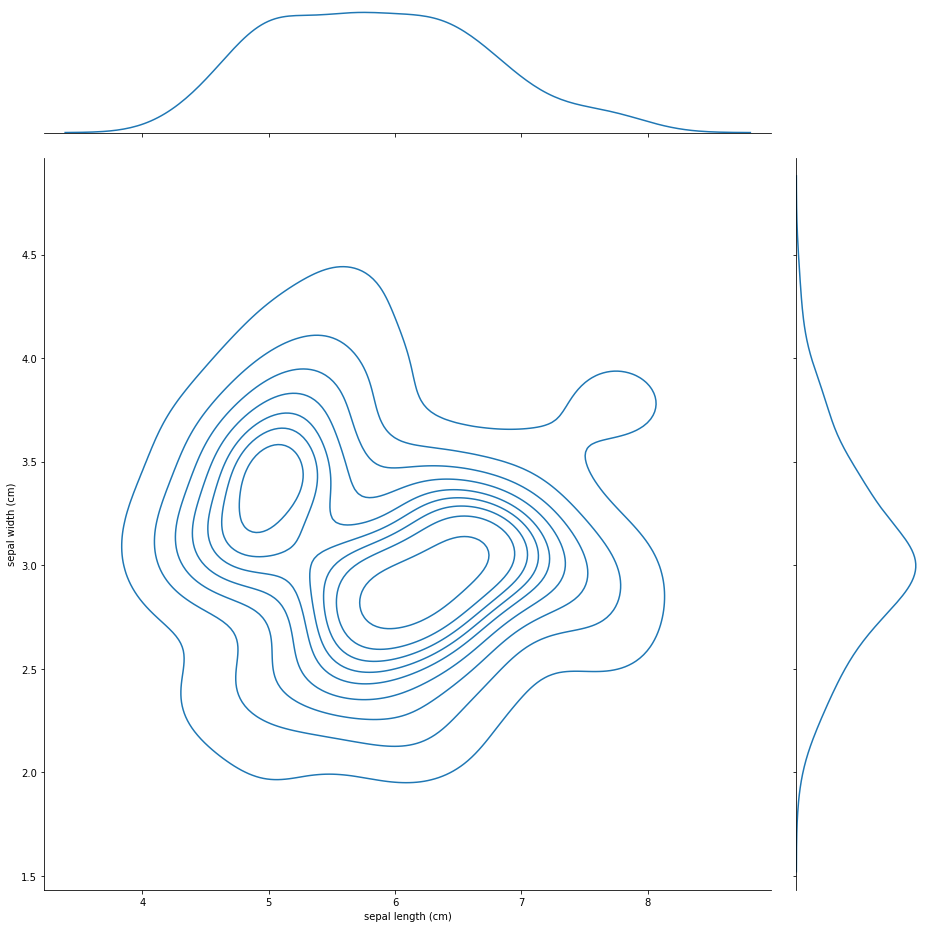

In [ ]:
sns.jointplot(data1['sepal length (cm)'],
              data1['sepal width (cm)'],
              size= 13, kind = 'kde')

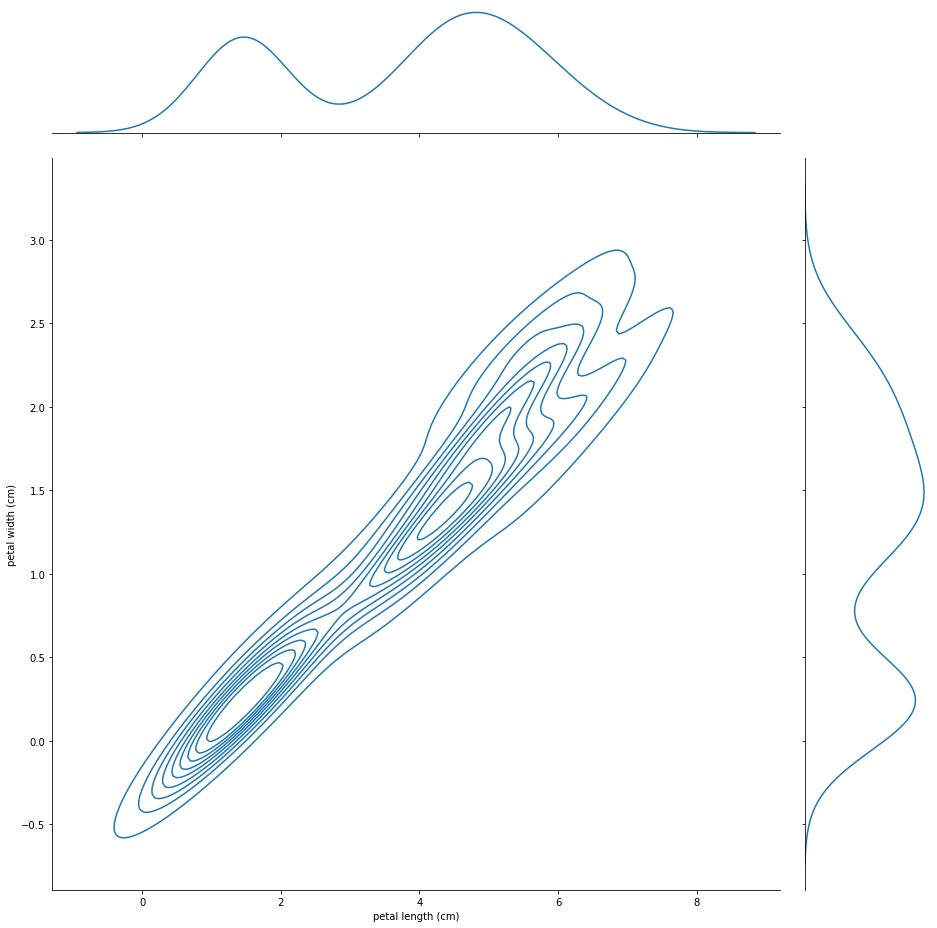

In [ ]:
sns.jointplot(data1['petal length (cm)'],
              data1['petal width (cm)'],
              size= 13, kind = 'kde')

From above plots, there appears a grouping trend of data elements.

Let's take a quick look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [ ]:
# View as an absolute count
data1.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

Now, we split the data into two(2) sets which are Train data and Test Data to check later on whether or not our K-Nearest Neighbour Classifier Model for Iris Data Set works correctly.

In [ ]:
from sklearn.model_selection import train_test_split

# All the measurement (features) are considered as X and the Species considered as y
X_train, X_test, y_train, y_test = train_test_split(data1[
                                                          ['sepal length (cm)',
                                                           'sepal width (cm)',
                                                           'petal length (cm)',
                                                           'petal width (cm)']],
                                                    data1['Species'],
                                                    random_state=0 )
# for a test data set for 4 types iris
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
# Show the four(4) features of the first 5 rows
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [ ]:
# Show the Species for the first 5 rows
y_train.head()

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

In [ ]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [ ]:
y_test.head()

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: Species, dtype: object

Let's try to classify the data to nearest data point and identify the species.

In [ ]:
# Instantiate learning model (k=4)
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Fitting the model with training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Before predict the result, it is possible to have estimate mean accuracy on the given test data and labels,

In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

Now, we want to predict the species value by supplying the test data.

In [ ]:
# Making prediction
# Supply the test data to predict Y (Species Value)
prediction  = knn.predict(X_test)
prediction

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

Next, we want to compare the predicted data from the Test sent and the y_test data.

In [ ]:
print('y_test             prediction')
print('.............................')
y_test + " " + prediction

y_test             prediction
.............................


114      virginica virginica
62     versicolor versicolor
33             setosa setosa
107      virginica virginica
7              setosa setosa
100      virginica virginica
40             setosa setosa
86     versicolor versicolor
76     versicolor versicolor
71     versicolor versicolor
134      virginica virginica
51     versicolor versicolor
73     versicolor versicolor
54     versicolor versicolor
63     versicolor versicolor
37             setosa setosa
78     versicolor versicolor
90     versicolor versicolor
45             setosa setosa
16             setosa setosa
121      virginica virginica
66     versicolor versicolor
24             setosa setosa
8              setosa setosa
126      virginica virginica
22             setosa setosa
44             setosa setosa
97     versicolor versicolor
93     versicolor versicolor
26             setosa setosa
137      virginica virginica
84     versicolor versicolor
27             setosa setosa
127      virginica virginica
132      virgi

From the above, we can see that the predicted data and the y_test data are same. This gives the highest confidence level on the model built.

Let's try another way by building the confusion matrix, classification report and calculate the model accuracy.

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.

In [ ]:
# Build the confusion matrix
# Precision = TP/(TP+FP)
# Recall = TP/(TP+FN)
cm = metrics.confusion_matrix(y_test, prediction)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

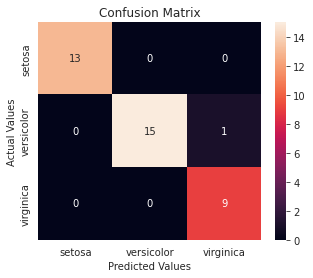

In [ ]:
# Creating a dataframe for array format Confusion matrix, so it will be easy to plot.
cm_df = pd.DataFrame(cm,
                     index = ['setosa', 'versicolor', 'virginica'],
                     columns = ['setosa', 'versicolor', 'virginica'])

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Show the classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
# Calculate the model accuracy
accuracy = accuracy_score(y_test, prediction)*100
print('Accuracy of the model is equal ' + str(round(accuracy, 2)) + '%.')

Accuracy of the model is equal 97.37%.


The results show that our KNN algorithm was able to classify all the 38 records in the test set with 97.37% accuracy, which is not perfect. Although the algorithm performed well with this dataset, don't expect the same results with all applications because KNN doesn't always perform as well with high-dimensionality or categorical features.

Let's try to use the cross-validation for parameter tuning to help us know which value yields the best results. We will plot the graph of K value and the corresponding error rate for the data set.

In [ ]:
# Creating list of k for knn
k_list = list(range(1, 50, 2))
# Creating list of cv scores
cv_scores = []

# To perform 10-fold cross validation
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

Then change it to misclassification error.

<Figure size 432x288 with 0 Axes>

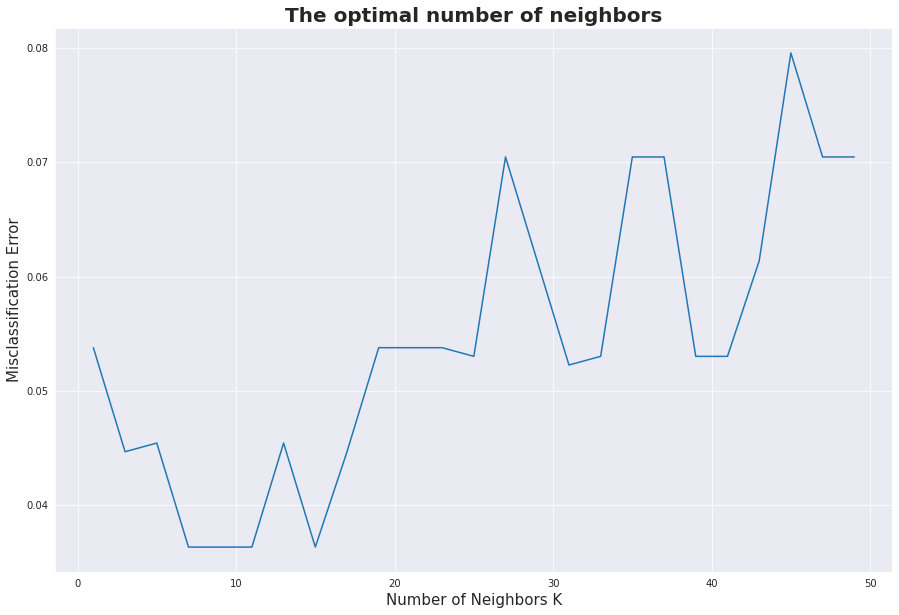

In [ ]:
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("darkgrid")
plt.plot(k_list, MSE)

plt.show()

Now find the best k by using the below code.

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 7.


By using below code, we can  look for the Sensivity which leads as how "sensitive" is the classifier for detecting the positive instances or prediction correct. It also known as "Trie Positive Rate or "Recall".

- TP / all positive
 where  all positive = TP + FN

In [ ]:
sensitivity = TP/float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, prediction))

NameError: ignored

ROC-Curve

A good way of visualizing the confusion matrix as a graph is the ROC-Curve. It plots the True Positive Rate against the False Positive Rate. The ideal Curve would go along the upper right corner. We can see that our plot almost does this which is really good. If our ROC-Curve was on the red line it would mean that our model was only as good as randomly guessing. And if it was below the red line our model would actually make worse predictions